In [1]:
from __future__ import division, print_function
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sys
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
sys.path.append('d:/home/migichen/projects/study/unet')
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

D:\apps\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\apps\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\apps\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\apps\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dty

In [3]:
nx = 1024
ny = 1024


In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [5]:
x_test, y_test = generator(1)
x_test.shape, y_test.shape

((1, 1024, 1024, 1), (1, 1024, 1024, 2))

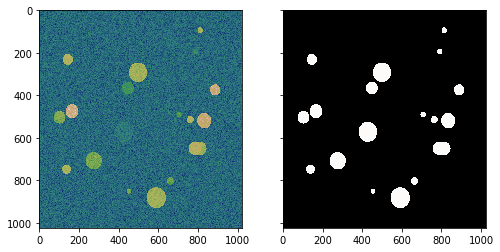

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2019-09-24 15:59:20,645 Layers 3, features 16, filter size 3x3, pool size: 2x2


Instructions for updating:
Colocations handled automatically by placer.


2019-09-24 15:59:20,659 From D:\apps\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-09-24 15:59:20,671 From d:/home/migichen/projects/study/unet\tf_unet\layers.py:39: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [ ]:
path = trainer.train(generator, "./unet_trained", training_iters=32, epochs=50, display_step=2)

2019-09-24 15:59:21,633 Removing 'D:\home\migichen\projects\study\unet\demo\prediction'
2019-09-24 15:59:21,637 Removing 'D:\home\migichen\projects\study\unet\demo\unet_trained'
2019-09-24 15:59:21,637 Allocating 'D:\home\migichen\projects\study\unet\demo\prediction'
2019-09-24 15:59:21,639 Allocating 'D:\home\migichen\projects\study\unet\demo\unet_trained'
2019-09-24 15:59:28,859 Verification error= 94.0%, loss= 0.7095
2019-09-24 15:59:31,119 Start optimization
2019-09-24 15:59:38,050 Iter 0, Minibatch Loss= 0.5830, Training Accuracy= 0.9510, Minibatch error= 4.9%
2019-09-24 15:59:39,818 Iter 2, Minibatch Loss= 0.4082, Training Accuracy= 0.9570, Minibatch error= 4.3%
2019-09-24 15:59:41,511 Iter 4, Minibatch Loss= 0.2939, Training Accuracy= 0.9263, Minibatch error= 7.4%
2019-09-24 15:59:43,203 Iter 6, Minibatch Loss= 0.2282, Training Accuracy= 0.9446, Minibatch error= 5.5%
2019-09-24 15:59:44,878 Iter 8, Minibatch Loss= 0.2480, Training Accuracy= 0.9344, Minibatch error= 6.6%
2019-09-

In [ ]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

In [ ]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto", cmap='gray')
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")